In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./statistical1.csv',sep=',')
df.head()

,homogeneity,entropy,variance,RESPONSE
0,1.105672,-0.914497,1.207659,6
1,-0.647547,-1.280561,-0.456169,6
2,0.320228,-0.229940,0.414703,6
3,-0.179339,-0.123697,0.814574,6
4,1.671744,-0.491253,1.442139,5


In [93]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [94]:
df.shape

(100, 4)

In [95]:
print(df['RESPONSE'].unique())

[6 5 4 3 2 1]


In [121]:
print(df.groupby('RESPONSE').size())

RESPONSE
1     5
2    23
3    32
4    22
5    12
6     6
dtype: int64


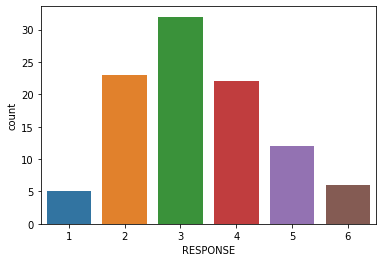

In [96]:
import seaborn as sns
sns.countplot(df['RESPONSE'],label="Count")
plt.show()

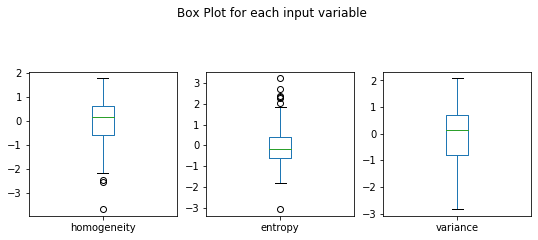

In [123]:
df.drop('RESPONSE', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('mango_box')
plt.show()

In [98]:
df.dtypes

homogeneity    float64
entropy        float64
variance       float64
RESPONSE         int64
dtype: object

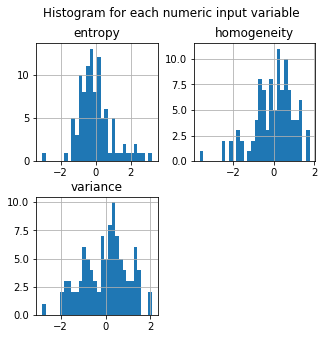

In [124]:
import pylab as pl
df.drop('RESPONSE' ,axis=1).hist(bins=30, figsize=(5,5))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('mango_hist')
plt.show()

In [102]:
df.dtypes

homogeneity    int32
entropy        int32
variance       int32
dtype: object

In [103]:
list(df.columns.values)

['homogeneity', 'entropy', 'variance']

In [104]:
df.describe()

,homogeneity,entropy,variance
count,100.000000,100.000000,100.000000
mean,-0.050000,0.100000,0.000000
std,0.687184,0.731679,0.651339
min,-3.000000,-3.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,3.000000,2.000000


In [113]:
from sklearn.model_selection import train_test_split
features = [ 'homogeneity','entropy','variance']
X = df[features]
y = df['RESPONSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.41
Accuracy of Logistic regression classifier on test set: 0.36


In [115]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.24


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.40


In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.40
Accuracy of LDA classifier on test set: 0.40


In [117]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.48
Accuracy of GNB classifier on test set: 0.32


In [118]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.52
Accuracy of SVM classifier on test set: 0.36


In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0 1 0 0 0]
 [0 2 2 0 0 0]
 [2 0 6 0 0 0]
 [0 0 5 2 1 0]
 [0 0 0 0 0 0]
 [0 0 3 0 0 0]]
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       1.00      0.50      0.67         4
           3       0.35      0.75      0.48         8
           4       1.00      0.25      0.40         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3

    accuracy                           0.44        25
   macro avg       0.45      0.33      0.32        25
weighted avg       0.62      0.44      0.42        25



C:\Users\AMArnath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMArnath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[0 2 0 0 0 0]
 [0 3 1 0 0 0]
 [0 1 6 1 0 0]
 [0 0 4 1 3 0]
 [0 0 0 0 0 0]
 [0 1 2 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.43      0.75      0.55         4
           3       0.46      0.75      0.57         8
           4       0.50      0.12      0.20         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3

    accuracy                           0.40        25
   macro avg       0.23      0.27      0.22        25
weighted avg       0.38      0.40      0.33        25



C:\Users\AMArnath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMArnath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x1790fe67048>,
 <a list of 5 Text xticklabel objects>)

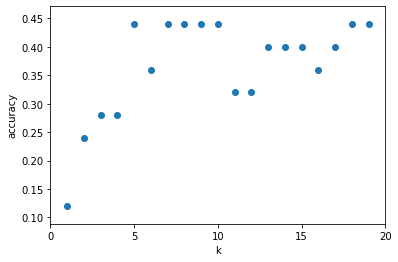

In [125]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])